# Change of variables formula

This reading reviews the change of variables formula for continuous random variables. This important formula is fundamental to the theory of normalising flows.

In [1]:
from IPython.display import Image

## Introduction

The change of variables formula tells us how to compute the probability density function of a random variable under a smooth invertible transformation. 

In this reading notebook we will review the statement of the change of variables formula in various forms. We will then look at a simple example of a linear change of variables in two dimensions, where the probability density function of the transformed variable can easily be written by inspection and checked against the change of variables formula. In the following section we provide a sketch of the proof of the formula in one dimension. Finally, we will conclude the reading by discussing how the change of variables formula is applied to normalising flows.

## Statement of the formula

Let $Z := (z_1,\ldots,z_d)\in\mathbb{R}^d$ be a $d$-dimensional continuous random variable, and suppose that $f:\mathbb{R}^d\rightarrow\mathbb{R}^d$ is a smooth, invertible transformation. Now consider the change of variables $X = f(Z)$, with $X=(x_1,\ldots,x_d)$, and denote the probability density functions of the random variables $Z$ and $X$ by $p_Z$ and $p_X$ respectively.

The change of variables formula states that

$$
p_X(x) = p_Z(z)\cdot\left|\det J_f(z) \right|^{-1},\qquad (1)
$$

where $J_f(z)$ is the _Jacobian_ of the transformation $f$, given by the matrix of partial derivatives

$$
J_f(z) = \left[ 
\begin{array}{ccc}
\frac{\partial f_1}{\partial z_1} & \cdots & \frac{\partial f_1}{\partial z_d}\\
\vdots & \ddots & \vdots\\
\frac{\partial f_d}{\partial z_1} & \cdots & \frac{\partial f_d}{\partial z_d}\\
\end{array}
\right],
$$

and $\left|\det J_f(z) \right|$ is the absolute value of the determinant of the Jacobian matrix. Note that (1) can also be written in the log-form

$$
\log p_X(x) = \log p_Z(z) - \log \hspace{0.1ex}\left|\det J_f(z) \right|.\qquad (2)
$$

Furthermore, we can equivalently consider the transformation $Z = f^{-1}(X)$. Then the change of variables formulae can be written as

$$
\begin{align}
p_Z(z) &= p_X(x)\cdot\left|\det J_{f^{-1}}(x) \right|^{-1},\qquad &(3)\\
\log p_Z(z) &= \log p_X(x) - \log \hspace{0.1ex}\left|\det J_{f^{-1}}(x) \right|.\qquad &(4)
\end{align}
$$

## A simple example

We will demonstrate the change of variables formula with a simple example. Let $Z=(z_1, z_2)$ be a 2-dimensional random variable that is uniformly distributed on the unit square $[0, 1]^2 =: \Omega_Z$. We also define the transformation $f:\mathbb{R}^2 \rightarrow \mathbb{R}^2$ as

$$
\begin{align}
f(z_1, z_2) = (\lambda z_1, \mu z_2)
\end{align}
$$

for some nonzero $\lambda, \mu\in\mathbb{R}$. The random variable $X=(x_1, x_2)$ is given by $X = f(Z)$. 

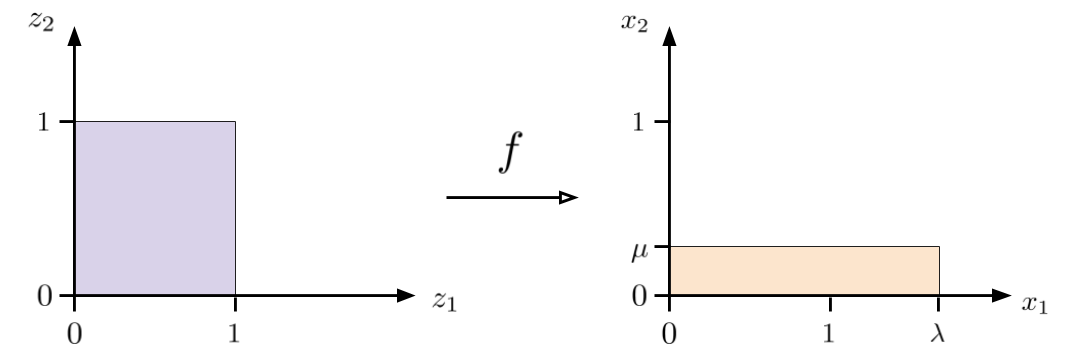

In [2]:
# Run this cell to download and view a figure to sketch the simple example transformation

!wget -q -O change_of_variables.png --no-check-certificate "https://docs.google.com/uc?export=download&id=1XX9XUyOP47IdvOXA_XirzaZgrprajDbf"
Image("change_of_variables.png", width=800)

**Figure 1.** Linearly transformed uniformly distributed random variable.

Since $\int_{\Omega_Z}p_Z(z)dz = 1$ and $Z$ is uniformly distributed, we have that 

$$
p_Z(z) = 1 \quad\text{for}\quad z\in\Omega_Z.
$$

The random variable $X$ is uniformly distributed on the region $\Omega_X = f(\Omega_Z)$ as shown in the figure above (for the case $\lambda, \mu>0$). Since again $\int_{\Omega_X}p_X(x)dx = 1$, the probability density function for $X$ must be given by 

$$
p_X(x) = \frac{1}{|\Omega_X|} = \frac{1}{|\lambda\mu |}\quad\text{for}\quad x\in\Omega_X.
$$

This result corresponds to the equations (1)-(4) above. In this simple example, the transformation $f$ is linear, and the Jacobian matrix is given by

$$
\begin{align}
J_f(z) = \left[
\begin{array}{cc}
\lambda & 0\\
0 & \mu
\end{array}
\right].
\end{align}
$$

The absolute value of the determinant is $\left|\det J_f(x) \right| = |\lambda\mu | \ne 0$. Equation (1) then implies

$$
\begin{align}
p_X(x) &= p_Z(z)\cdot\left|\det J_f(z) \right|^{-1}\\
&= \frac{1}{|\lambda\mu|}.
\end{align}
$$

Writing in the log-form as in equation (2) gives

$$
\begin{align}
\log p_X(x) &= \log p_Z(z) - \log \hspace{0.1ex}\left|\det J_f(z) \right|\\
&= \log (1) - \log |\lambda\mu|\\
&= - \log |\lambda\mu|.
\end{align}
$$

## Sketch of proof in 1-D

We now provide a sketch of the proof of the change of variables formula in one dimension. Let $Z$ and $X$ be random variables such that $X = f(Z)$, where $f : \mathbb{R}\rightarrow\mathbb{R}$ is a $C^k$ diffeomorphism with $k\ge 1$. The change of variables formula in one dimension can be written

$$
p_X(x) = p_Z(z)\cdot\left| \frac{d}{dz}f(z) \right|^{-1},\qquad\text{(cf. equation (1))}
$$

or equivalently as

$$
p_X(x) = p_Z(z)\cdot\left| \frac{d}{dx}f^{-1}(x) \right|.\qquad\text{(cf. equation (3))}
$$

_Sketch of proof._ For $f$ to be invertible, it must be strictly monotonic. That means that for all $x^{(1)}, x^{(2)}\in\mathbb{R}$ with $x^{(1)} < x^{(2)}$, we have $f(x^{(1)}) < f(x^{(2)})$ (strictly monotonically increasing) or $f(x^{(1)}) > f(x^{(2)})$ (strictly monotonically decreasing).

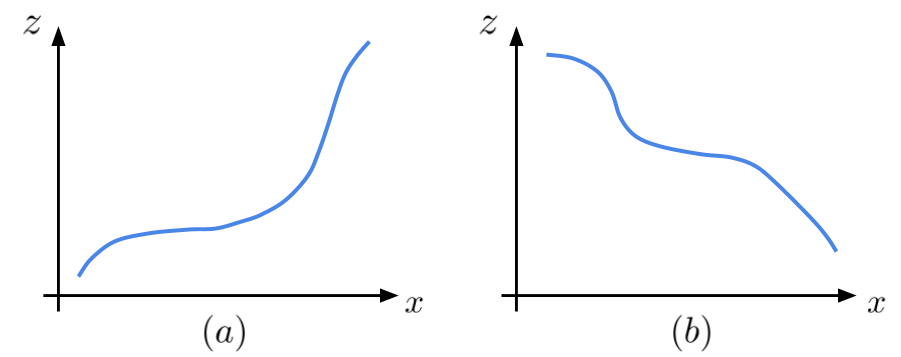

In [3]:
# Run this cell to download and view a sketch figure of monotonic functions

!wget -q -O change_of_variables_monotonic.png --no-check-certificate "https://docs.google.com/uc?export=download&id=1HnCZ8y6WdbBCroUR22ST4QNF8gKeFKH6" 
Image("change_of_variables_monotonic.png", width=600)

**Figure 2.** Sketch of monotonic functions: (a) strictly increasing, (b) strictly decreasing.

Suppose first that $f$ is strictly increasing. Also let $F_X$ and $F_Z$ be the cumulative distribution functions of the random variables $X$ and $Z$ respectively. Then we have

$$
\begin{align}
F_X(x) &= P(X \le x)\\
&= P(f(Z) \le x)\\
&= P(Z \le f^{-1}(x))\qquad\text{(since $f$ is monotonically increasing)}\\
&= F_Z(f^{-1}(x))
\end{align}
$$

By differentiating on both sides with respect to $x$, we obtain the probability density function:

$$
\begin{align}
p_X(x) &= \frac{d}{dx}F_X(x)\\
&= \frac{d}{dx} F_Z(f^{-1}(x))\\
&= \frac{d}{dz}F_Z(z)\cdot\frac{d}{dx}f^{-1}(x)\\
&= p_Z(z)\frac{d}{dx}f^{-1}(x)\qquad\quad (5)
\end{align}
$$

Now suppose first that $f$ is strictly decreasing. Then

$$
\begin{align}
F_X(x) &= P(X \le x)\\
&= P(f(Z) \le x)\\
&= P(Z \ge f^{-1}(x))\qquad\text{(since $f$ is monotonically decreasing)}\\
&= 1 - F_Z(f^{-1}(x))
\end{align}
$$

Again differentiating on both sides with respect to $x$:

$$
\begin{align}
p_X(x) &= \frac{d}{dx}F_X(x)\\
&= -\frac{d}{dx} F_Z(f^{-1}(x))\\
&= -F_Z'(f^{-1}(x))\frac{d}{dx}f^{-1}(x)\\
&= -p_Z(z)\frac{d}{dx}f^{-1}(x)\qquad\quad (6)
\end{align}
$$

Now note that the inverse of a strictly monotonically increasing (resp. decreasing) function is again strictly monotonically increasing (resp. decreasing). This implies that the quantity $\frac{d}{dx} f^{-1}(x)$ is positive in (5) and negative in (6), and so these two equations can be combined into the single equation:

$$
p_X(x) = p_Z(z)\left|\frac{d}{dx}f^{-1}(x)\right|
$$

which completes the proof.

## Normalising flows

Normalising flows are a class of models that exploit the change of variables formula to estimate an unknown target data density. 

Suppose we have data samples $\mathcal{D}:=\{x^{(1)}, \ldots, x^{(n)}\}$, with each $x^{(i)}\in\mathbb{R}^d$, and assume that these samples are generated i.i.d. from the underlying distribution $p_X$. 

A normalising flow models the distribution $p_X$ using a random variable $Z$ (also of dimension $d$) with a simple distribution $p_Z$ (e.g. an isotropic Gaussian), such that the random variable $X$ can be written as a change of variables $X = f_\theta(Z)$, where $\theta$ is a parameter vector that parameterises the smooth invertible function $f_\theta$. 

The function $f_\theta$ is modelled using a neural network with parameters $\theta$, which we want to learn from the data. An important point is that this neural network must be designed to be invertible, which is not the case in general with deep learning models. In practice, we often construct the neural network by composing multiple simpler blocks together. In TensorFlow Probability, these simpler blocks are the _bijectors_ that we will study in the first part of the week.

In order to learn the optimal parameters $\theta$, we apply the principle of maximum likelihood and search for $\theta_{ML}$ such that

$$
\begin{align}
\theta_{ML} &:= \arg \max_{\theta} P(\mathcal{D}; \theta)\\
&= \arg \max_{\theta} \log P(\mathcal{D}; \theta).
\end{align}
$$

In order to compute $\log P(\mathcal{D}; \theta)$ we can use the change of variables formula:

$$
\begin{align}
P(\mathcal{D}; \theta) &= \prod_{x\in\mathcal{D}}  p_Z(f_\theta^{-1}(x)) \cdot\left|\hspace{0.1ex}\det J_{f_\theta^{-1}}(x) \hspace{0.1ex}\right|\\
\log P(\mathcal{D}; \theta) &= \sum_{x\in\mathcal{D}} \log p_Z(f_\theta^{-1}(x)) + \log \hspace{0.1ex}\left|\hspace{0.1ex}\det J_{f_\theta^{-1}}(x) \hspace{0.1ex}\right|\qquad (7)
\end{align}
$$

The term $p_Z(f_\theta^{-1}(x))$ can be computed for a given data point $x\in\mathcal{D}$ since the neural network $f_\theta$ is designed to be invertible, and the distribution $p_Z$ is known. The term $\det J_{f_\theta^{-1}}(x)$ is also computable, although this also highlights another important aspect of normalising flow models: they should be designed such that the determinant of the Jacobian can be efficiently computed.

The log-likelihood (7) is usually optimised as usual in minibatches, with gradient-based optimisation methods.

### Further reading and resources

Some general resources related to the content of this reading are:

* https://en.wikipedia.org/wiki/Probability_density_function
* https://en.wikipedia.org/wiki/Cumulative_distribution_function
* https://en.wikipedia.org/wiki/Monotonic_function